## Imports

In [5]:
import numpy as np 
import pandas as pd
from PyUtils import MyPyUtils as utils
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [6]:
filePath = "churn_D208-2.csv"
df = pd.read_csv(filePath, index_col=0)
df

,Population,Rural,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod_Auto,Tenure,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,,,,,,,,
1,38,0,0,68,28561.99,0,7.978323,10,0,1,...,1,0,0,0,1,1,1,6.795513,172.455519,904.536110
2,10446,0,1,27,21704.77,1,11.699080,12,0,1,...,0,0,0,1,1,1,1,1.156681,242.632554,800.982766
3,3735,0,4,50,9609.57,0,10.752800,9,0,1,...,0,0,0,0,1,1,1,15.754144,159.947583,2054.706961
4,13863,0,1,48,18925.23,0,14.913540,15,2,0,...,0,0,0,1,0,1,0,17.087227,119.956840,2164.579412
5,11352,0,0,83,40074.19,1,8.147417,16,2,1,...,0,0,1,1,0,0,0,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,640,1,3,23,55723.74,0,9.415935,12,2,0,...,1,1,0,0,0,0,0,68.197130,159.979400,6511.252601
9997,77168,1,4,48,34129.34,0,6.740547,15,2,0,...,1,1,0,1,0,0,0,61.040370,207.481100,5695.951810
9998,406,1,1,48,45983.43,0,6.590911,10,0,0,...,1,0,0,0,0,1,1,47.416890,169.974100,4159.305799


In [7]:
df.info()
utils.writeDFToFile(df, "df_info_1.txt")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population             10000 non-null  int64  
 1   Rural                  10000 non-null  int64  
 2   Children               10000 non-null  int64  
 3   Age                    10000 non-null  int64  
 4   Income                 10000 non-null  float64
 5   Churn                  10000 non-null  int64  
 6   Outage_sec_perweek     10000 non-null  float64
 7   Email                  10000 non-null  int64  
 8   Contacts               10000 non-null  int64  
 9   Yearly_equip_failure   10000 non-null  int64  
 10  Techie                 10000 non-null  int64  
 11  Contract_Monthly       10000 non-null  int64  
 12  Port_modem             10000 non-null  int64  
 13  Tablet                 10000 non-null  int64  
 14  InternetService_Fiber  10000 non-null  int64  
 15  In

# Summary Statistics

In [8]:
df.columns

Index(['Population', 'Rural', 'Children', 'Age', 'Income', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract_Monthly', 'Port_modem', 'Tablet',
       'InternetService_Fiber', 'InternetService_DSL', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod_Auto', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [9]:
df[['Population','Children','Age','Income','Outage_sec_perweek','Email','Contacts',
    'Yearly_equip_failure','Tenure','MonthlyCharge','Bandwidth_GB_Year'
    ]].describe().loc[['mean', '50%', 'std', 'min', 'max']]

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


# Sampling Data
80% Trainig sample , 30% Test sample

In [10]:
target = 'Churn'
Y = df[target] #target
X = df.drop(target, axis=1) #Predictors
split_by = df['Churn']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=split_by)
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (7000, 28)
y_train: (7000,)
x_test: (3000, 28)
y_test: (3000,)


## Logistic Regression

In [11]:
target = 'Churn'
Y = df[target] #target
X = df.drop(target, axis=1) #Predictors

model1 = LogisticRegression(solver='lbfgs', max_iter=500)
model1.fit(X, Y)

# print(X.columns.shape)
# print(X.columns)

# print("\ncoef_")
# print(model.coef_[0])

print("\nintercept_")
print(model1.intercept_)

y_predicted = model1.predict(x_test)

print("\nscore_")
score = model1.score(x_test, y_test)
print(score)



intercept_
[-0.10810774]

score_
0.8486666666666667


In [12]:
feature_names = x_train.columns
feature_importance = (
	pd.DataFrame({
		'variable': feature_names,
		'coefficient': model1.coef_[0]
	})
    # .round(decimals=2)
	.sort_values('coefficient', ascending=False)
	.style.bar(color=['red','green'], align='zero')
)
feature_importance

,variable,coefficient
10,Contract_Monthly,0.460525
22,StreamingMovies,0.181764
21,StreamingTV,0.110153
9,Techie,0.065617
16,Multiple,0.017739
26,MonthlyCharge,0.016306
14,InternetService_DSL,0.016008
27,Bandwidth_GB_Year,0.002913
4,Income,-0.000005
0,Population,-0.000006


Accuracy = TP+TN / TP+TN+FP+FN


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2205
           1       0.73      0.68      0.70       795

    accuracy                           0.85      3000
   macro avg       0.81      0.79      0.80      3000
weighted avg       0.85      0.85      0.85      3000


confusion_matrix_
TP | FP 
FN | TN 

[[2005  200]
 [ 254  541]]


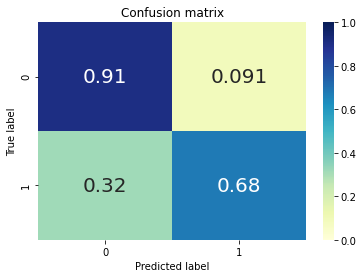

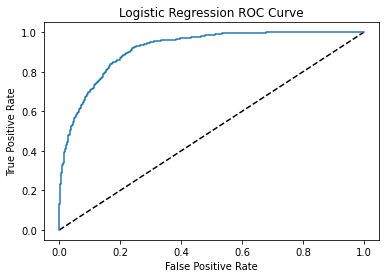

In [13]:
print("\nClassification Report")
report1 = classification_report(y_test,y_predicted)
print(report1)

print("\nconfusion_matrix_")
print("TP | FP \nFN | TN \n")
cm1 = confusion_matrix(y_test, y_predicted)
print(cm1)

# Normalize the confusion matrix and plot
cm_norm1 = cm1 / cm1.sum(axis=1).reshape(-1,1)
utils.plot_confusion_matrix1(cm_norm1, classes = model1.classes_, title='Confusion matrix')

utils.plot_roc_curve(model1,x_test,y_test)

## Feature Selection

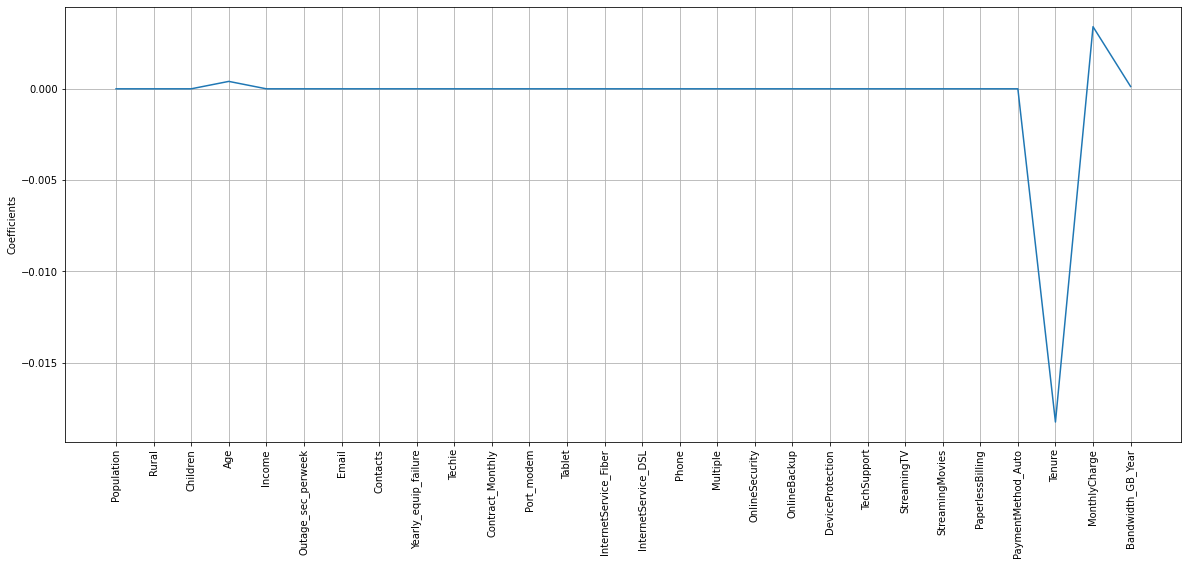

In [14]:
x = x_train
y = y_train
candidates_columns = X.columns
utils.lasso_for_feature(x, y, candidates_columns)

In [15]:
# Run a decision trees to identify most important features
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel = DecisionTreeClassifier(random_state=42, criterion = 'entropy', max_depth = 10)
DecisionTreeModel.fit(x_train,y_train)

# Decesion Trees tutorials: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Official Doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# DecisionTree maths, here: https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

# Save Feature Importance
features = []
importance = []
for i,column in enumerate(x_train):
    # print('The feature importance for {} is : {}'.format(column, DecisionTreeModel.feature_importances_[i]))
    features.append(column)
    importance.append(DecisionTreeModel.feature_importances_[i-1])
# Creating a Dataframe
fi_df = zip(features, importance)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Importance'])
fi_df = fi_df.sort_values('Importance', ascending = False).reset_index()

# Creating columns to keep
columns_to_keep = fi_df['Feature'][0:13]

fi_df

,index,Feature,Importance
0,26,MonthlyCharge,0.319659
1,27,Bandwidth_GB_Year,0.274388
2,11,Port_modem,0.133178
3,14,InternetService_DSL,0.036483
4,0,Population,0.034213
5,5,Outage_sec_perweek,0.029402
6,6,Email,0.028847
7,15,Phone,0.018899
8,1,Rural,0.017365
9,4,Income,0.017199


## Clean Data
Removing columns not relevant for this analysis.

In [16]:
print(x_train.shape)
x_train_reduced = x_train[columns_to_keep]
print(x_train_reduced.shape)
print(x_train_reduced.columns)

(7000, 28)
(7000, 13)
Index(['MonthlyCharge', 'Bandwidth_GB_Year', 'Port_modem',
       'InternetService_DSL', 'Population', 'Outage_sec_perweek', 'Email',
       'Phone', 'Rural', 'Income', 'Contacts', 'Age', 'Contract_Monthly'],
      dtype='object')


## Logistic Regression (Refined Model)

In [17]:
model2 = LogisticRegression(solver='lbfgs', max_iter=500)
model2.fit(x_train, y_train)

print("\ncoef_")
print(model2.coef_[0])

print("\nintercept_")
print(model2.intercept_)

print("\ny_predict")
y_predicted = model2.predict(x_test)
print(y_predicted)

print("\ny_predict_proba")
y_predicted_proba = model2.predict_proba(x_test)
print(y_predicted_proba)

print("\nscore_")
score = model2.score(x_test, y_test)
print(score)


coef_
[-4.62773533e-06 -5.88239044e-03 -5.18467263e-02 -1.64813011e-03
 -4.62206887e-06 -1.15186889e-01 -1.48051092e-01 -2.09063683e-02
 -1.22292833e-02  1.44176441e-02  9.49751108e-02 -8.27791924e-03
 -1.01712138e-02 -6.13941745e-02  3.54884709e-02 -2.64304907e-02
  3.09896277e-03 -1.80303577e-02 -1.23858615e-02 -9.81198549e-03
 -1.26491125e-02  3.29505792e-02  4.36043373e-02 -1.55897230e-02
 -2.12308349e-02 -2.85215926e-01  1.55198088e-02  2.55716170e-03]

intercept_
[-0.02650802]

y_predict
[1 0 0 ... 0 0 0]

y_predict_proba
[[4.18727214e-01 5.81272786e-01]
 [8.94463139e-01 1.05536861e-01]
 [5.53456115e-01 4.46543885e-01]
 ...
 [9.04022380e-01 9.59776196e-02]
 [9.97802053e-01 2.19794711e-03]
 [9.99381699e-01 6.18301294e-04]]

score_
0.836


In [18]:
dict(zip(x_train.columns, model2.coef_[0]))

{'Population': -4.627735325893892e-06,
 'Rural': -0.005882390439747197,
 'Children': -0.05184672631774078,
 'Age': -0.0016481301113688892,
 'Income': -4.622068865889815e-06,
 'Outage_sec_perweek': -0.1151868889426502,
 'Email': -0.14805109208962938,
 'Contacts': -0.020906368271507658,
 'Yearly_equip_failure': -0.012229283261858586,
 'Techie': 0.01441764409059894,
 'Contract_Monthly': 0.09497511077357126,
 'Port_modem': -0.008277919240763177,
 'Tablet': -0.010171213805396914,
 'InternetService_Fiber': -0.0613941745323721,
 'InternetService_DSL': 0.03548847091758296,
 'Phone': -0.02643049068334518,
 'Multiple': 0.0030989627712647815,
 'OnlineSecurity': -0.018030357714022623,
 'OnlineBackup': -0.012385861535484044,
 'DeviceProtection': -0.009811985485414853,
 'TechSupport': -0.012649112464418907,
 'StreamingTV': 0.03295057920235532,
 'StreamingMovies': 0.04360433728682341,
 'PaperlessBilling': -0.015589723026422538,
 'PaymentMethod_Auto': -0.02123083492424343,
 'Tenure': -0.28521592643918


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2205
           1       0.70      0.67      0.68       795

    accuracy                           0.84      3000
   macro avg       0.79      0.78      0.79      3000
weighted avg       0.83      0.84      0.83      3000


confusion_matrix_
TP | FP 
FN | TN 

[[1978  227]
 [ 265  530]]


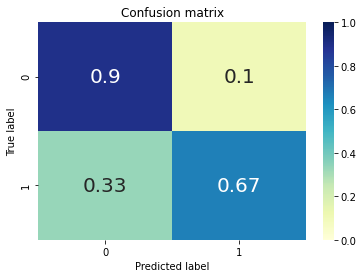

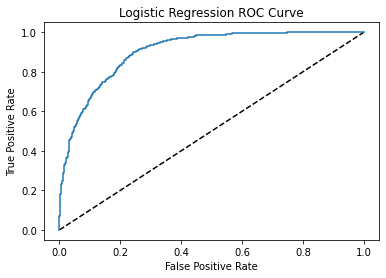

In [20]:
print("\nClassification Report")
report = classification_report(y_test,y_predicted)
print(report)

print("\nconfusion_matrix_")
print("TP | FP \nFN | TN \n")
cm = confusion_matrix(y_test, y_predicted)
print(cm)

# Normalize the confusion matrix and plot
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
utils.plot_confusion_matrix1(cm_norm, classes = model2.classes_, title='Confusion matrix')

utils.plot_roc_curve(model2,x_test,y_test)